In [1]:
import jsonpickle

In [2]:
learned_parameter_theta_file_name = 'learned_parameter_theta.json'

In [3]:
learned_parameter_theta_dict = jsonpickle.decode(open(learned_parameter_theta_file_name).read())

In [4]:
theta = learned_parameter_theta_dict['learned_parameter_theta']

In [5]:
import gym
import utils
import config as C
import numpy as np

env = gym.make('Pendulum-v0')

In [6]:
rewards = []

#test the training result
observation = env.reset()
current_feature = utils.extract_features(observation,C.output_dim)
for t in range(200):

    #env.render()

    #compute an action given current observation
    action = utils.compute_action_distribution(theta, current_feature, mode = 'test')

    #apply the action to the environment
    observation, reward, done, info = env.step(action)

    #compute the next feature vector
    current_feature = utils.extract_features(observation, C.output_dim)

    rewards.append(reward)
    
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break

Episode finished after 200 timesteps


In [7]:
np.sum(rewards)

-133.07828

In [8]:
goal = []

for _ in range(0,100):
    
    rewards = []

    #test the training result
    observation = env.reset()
    current_feature = utils.extract_features(observation,C.output_dim)
    for t in range(200):

        #env.render()

        #compute an action given current observation
        action = utils.compute_action_distribution(theta, current_feature, mode = 'test')

        #apply the action to the environment
        observation, reward, done, info = env.step(action)

        #compute the next feature vector
        current_feature = utils.extract_features(observation, C.output_dim)

        rewards.append(reward)

    goal.append(np.sum(rewards))

In [9]:
np.mean(goal)

-161.5193

In [10]:
np.std(goal)

103.233315

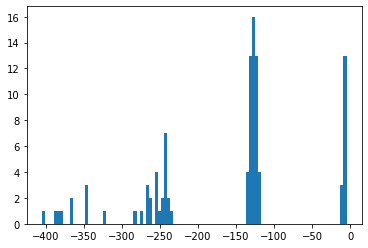

In [11]:
import matplotlib.pyplot as plt
plt.hist(goal,bins = 100)
plt.show()